In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt

In [2]:
# Unit Cell
a = 1.0
w = 0.9*a

# Grid size
Nx = 255
Ny = Nx

# Truncated FFT size
NP = 7
NQ = NP

## Build Unit Cell

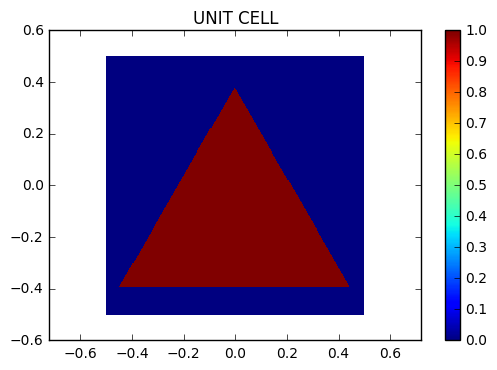

In [3]:
# Triangle grid
dx = a/Nx
dy = a/Ny
xa = np.arange(0, Nx)*dx
ya = np.arange(0, Ny)*dy
xa = xa - np.average(xa)
ya = ya - np.average(ya)
X, Y = np.meshgrid(xa, ya)

# Grid indices of the triangle
h = w*np.sqrt(3.0)/2
ny = int(np.round(h/dy))
ny1 = int(np.floor((Ny-ny)/2.0))
ny2 = ny1 + ny - 1


UC = np.zeros((Nx, Ny))
for ny in range(ny1, ny2+1):
    f = 1 - float((ny-ny1 + 1))/(ny2 - ny1 + 1)
    nx = int(np.round(f*w/dx))
    nx1 = int(np.floor((Nx-nx)/2.0))
    nx2 = nx1 + nx - 1
    UC[nx1:nx2, ny-1] = 1

# UC = np.ones((Nx, Ny)) * 9.0

plt.pcolormesh(xa, ya, UC.T)
plt.axis('equal')
plt.colorbar()
plt.title('UNIT CELL')
plt.show()

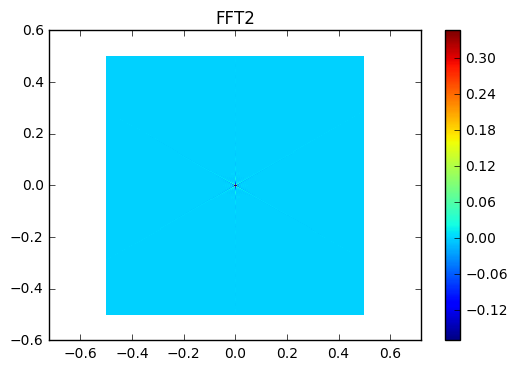

In [4]:
A = fftshift(fft2(UC))/(Nx*Ny)

plt.pcolormesh(xa, ya, np.real(A.T))
plt.axis('equal')
plt.colorbar()
plt.title('FFT2')
plt.show()

124 131
124 131
[-4 -3 -2 -1  0  1  2  3]
[-4 -3 -2 -1  0  1  2  3]


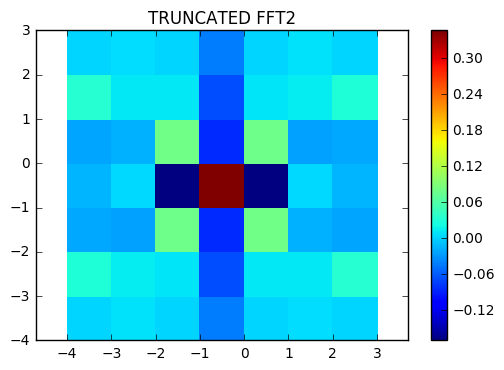

In [5]:
p0 = int(np.ceil(Nx/2))
q0 = int(np.ceil(Ny/2))
np1 = p0 - NP/2
np2 = p0 + (NP+1)/2
nq1 = q0 - NQ/2
nq2 = q0 + (NQ+1)/2

print np1, np2
print nq1, nq2

pa = np.arange(-NP/2, NP/2 + 1)
qa = np.arange(-NQ/2, NQ/2 + 1)

print pa
print qa

AT = A[np1:np2, nq1:nq2]

plt.pcolormesh(pa, qa, np.real(AT.T))
plt.axis('equal')
plt.colorbar()
plt.title('TRUNCATED FFT2')
plt.show()